In [99]:
import tensorflow as tf
import time
from tensorflow import keras
import tensorflow.keras.layers as layer
import gym
import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorlayer as tl
import torch
import torch.nn as nn
import random
import tensorflow_probability as tfp

In [100]:
class policy_network(keras.Model):
    def __init__(self):
        super(policy_network,self).__init__()
        self.l1=keras.layers.Dense(32,activation=tf.nn.relu)
#         self.l2=keras.layers.Dense(16,activation=tf.nn.relu)
        self.l3=keras.layers.Dense(2,activation='softmax') #输出离散概率值
        
    def call(self,inputs):
        y=self.l1(inputs)
#         y=self.l2(y)
        y=self.l3(y)
        return y

In [101]:
env = gym.make('CartPole-v1')

In [102]:
class Agent():
    def __init__(self,env,gamma=0.9):
        self.env=env
        self.state_dim=self.env.observation_space.shape[0]
        self.action_dim=self.env.action_space.n
        self.buffer=[]
        self.model=policy_network()
        self.optim=tf.keras.optimizers.Adam()
        self.gamma=gamma
    def choose_action(self,state):
        prob=self.model(np.array([state],np.float32))
        dist=tfp.distributions.Categorical(probs=prob,dtype=tf.float32)
        action=dist.sample()
        return int(action.numpy()[0])
            
    def train(self,state,action,reward):
        discount_reward=[]
        r=0
        #get G
        for i in reversed(range(len(reward))):
            r=self.gamma*r+reward[i]
            discount_reward.append(r)
        discount_reward.reverse()
        discount_reward-=np.mean(discount_reward)
        discount_reward/=np.std(discount_reward)

        for st,re,act in zip(state,discount_reward,action):
            with tf.GradientTape() as tape:
                p=self.model(np.array([st],dtype=np.float32),training=True)
                dist=tfp.distributions.Categorical(probs=p, dtype=tf.float32)
                log_pro=dist.log_prob(act)
                loss=-log_pro*re
            grads=tape.gradient(loss,self.model.trainable_variables)
            self.optim.apply_gradients(zip(grads, self.model.trainable_variables))

In [103]:
epochs=200
agent=Agent(env)

In [104]:
history=[]
for epochs in range(epochs):
    state=env.reset()
    reward_buffer=[]
    state_buffer=[]
    action_buffer=[]
    total_reward,done=0,False
    t=0
    while not done:
        action=agent.choose_action(state)
        next_state,reward,done,_=env.step(action)
        reward_buffer.append(reward)
        state_buffer.append(state)
        action_buffer.append(action)
        state=next_state
        total_reward+=reward
        if done:
            history.append(total_reward)
            agent.train(state_buffer,action_buffer,reward_buffer)
#             print("total step for this episord are {}".format(t))
            print("total reward after {} steps is {}".format(epochs, total_reward))
    

total reward after 0 steps is 17.0
total reward after 1 steps is 28.0
total reward after 2 steps is 16.0
total reward after 3 steps is 28.0
total reward after 4 steps is 12.0
total reward after 5 steps is 28.0
total reward after 6 steps is 64.0
total reward after 7 steps is 19.0
total reward after 8 steps is 8.0
total reward after 9 steps is 19.0
total reward after 10 steps is 43.0
total reward after 11 steps is 24.0
total reward after 12 steps is 33.0
total reward after 13 steps is 19.0
total reward after 14 steps is 42.0
total reward after 15 steps is 31.0
total reward after 16 steps is 56.0
total reward after 17 steps is 51.0
total reward after 18 steps is 42.0
total reward after 19 steps is 22.0
total reward after 20 steps is 25.0
total reward after 21 steps is 26.0
total reward after 22 steps is 40.0
total reward after 23 steps is 25.0
total reward after 24 steps is 112.0
total reward after 25 steps is 18.0
total reward after 26 steps is 26.0
total reward after 27 steps is 44.0
to

In [113]:
s = env.reset()
score = 0
for _ in range(1000):
    env.render()
#     time.sleep(0.01)
    a = agent.choose_action(np.array([s],dtype=np.float32))
    s, reward, done, _ = env.step(a)
    score += reward
    if done:
        print('score:', score)
        break
env.close()

score: 254.0


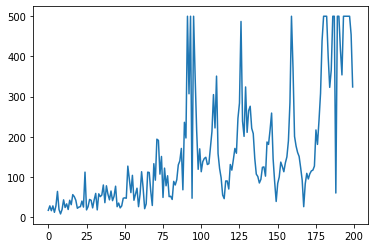

In [114]:
plt.plot(history)